<a href="https://colab.research.google.com/github/farshadabdulazeez/deep-learning-basics/blob/main/Feature_Scaling_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

**Load the dataset and select relevant columns**

In [3]:
import kagglehub

path = kagglehub.dataset_download("rakeshrau/social-network-ads")
print("path:", path)

dataset_file = f"{path}/Social_Network_Ads.csv"

#Load the dataset
df = pd.read_csv(dataset_file)
df = df.iloc[:, 2:]
df.head()

path: /root/.cache/kagglehub/datasets/rakeshrau/social-network-ads/versions/1


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


**Visualizing the raw data using a scatter plot**

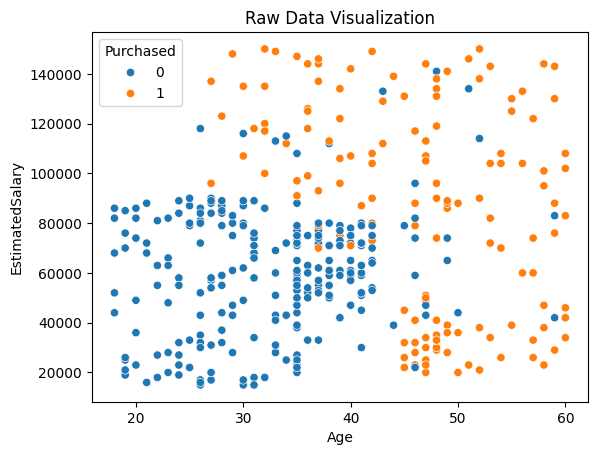

In [4]:
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df.iloc[:, 2])
plt.title('Raw Data Visualization')
plt.show()

**Splitting the dataset into features (X) and target (y)**

In [7]:
X = df.iloc[:, 0:2]  # Feature columns
y = df.iloc[:, -1]   # Target column

**Splitting data into training and testing sets**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**Building the neural network without scaling**

In [9]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))  # Hidden layer with 128 neurons
model.add(Dense(1, activation='sigmoid'))             # Output layer for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Summarizing the model**

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

**Compiling the model**

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**Training the model without scaling**

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)


**Plotting validation accuracy for the unscaled data**

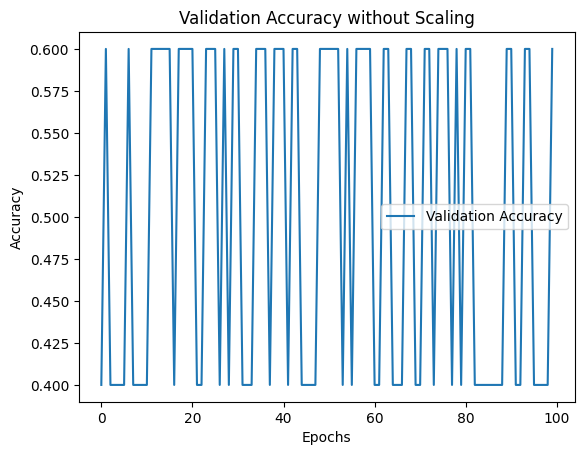

In [13]:
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy without Scaling')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Applying feature scaling using StandardScaler**

In [14]:
scaler = StandardScaler()  # Initialize scaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)        # Transform the testing data

**Visualizing the scaled data (note the scale difference)**

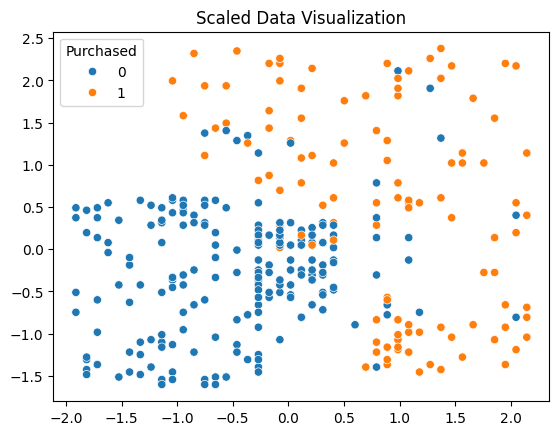

In [15]:
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=y_train)
plt.title('Scaled Data Visualization')
plt.show()

**Rebuilding the neural network with scaled data**

In [16]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))  # Hidden layer with 128 neurons
model.add(Dense(1, activation='sigmoid'))             # Output layer for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compiling the model**

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Training the model with scaled data**

In [18]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, verbose=0)

**Plotting validation accuracy for the scaled data**

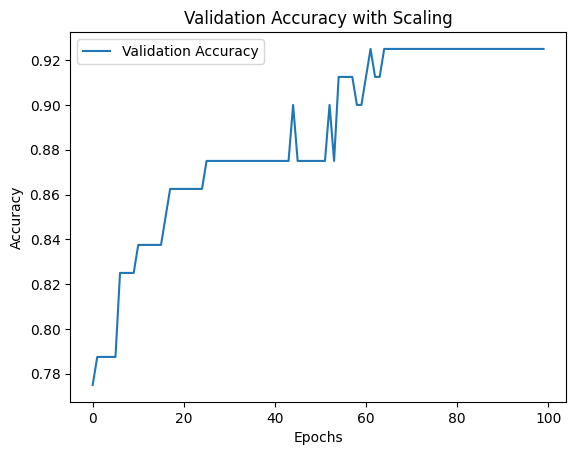

In [19]:
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy with Scaling')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **Conclusion:**

**Without Feature Scaling**:



*   The raw data can lead to poor model performance, especially when features have varying ranges.
*   The model might converge more slowly, as observed in the accuracy plot.





**With Feature Scaling**:



*   Scaling standardizes the range of the input features, which helps the model learn more effectively.
*   Results in faster convergence and improved performance, as demonstrated by higher validation accuracy within fewer epochs.


